<a href="https://colab.research.google.com/github/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [ ]:
#Import the necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.pipeline import Pipeline
import numpy as np

# Load the dataset
data = pd.read_csv("imdb_reviews_cleaned.csv")

#Preprocessing : Since the data is already cleaned from assigment 2, we can skip this step

# Text Representation: We use TF-IDF as text representation method
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_features = tfidf_vectorizer.fit_transform(data["Cleaned Review"])

# Topic Modeling : Apply LDA algorithm
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda_pipeline = Pipeline([('tfidf', tfidf_vectorizer), ('lda', lda)])
lda_pipeline.fit(data["Cleaned Review"])

# Get top keywords for each topic
feature_names = tfidf_vectorizer.get_feature_names_out()
top_keywords = []
for topic_idx, topic in enumerate(lda.components_):
    top_keywords.append([feature_names[i] for i in topic.argsort()[:-11:-1]])

# Summarize and Describe Topics
for idx, keywords in enumerate(top_keywords):
    print(f"Topic {idx+1}:")
    print("Keywords:", ", ".join(keywords))
    print()


Topic 1:
Keywords: ill, similar, live, gonna, sic, came, shock, heart, overli, audio

Topic 2:
Keywords: georg, content, clich, sound, sell, costum, confus, full, sign, badli

Topic 3:
Keywords: end, although, cheesi, along, develop, next, appear, act, chang, modern

Topic 4:
Keywords: least, new, half, surpris, pictur, got, viewer, see, your, follow

Topic 5:
Keywords: statham, beekeep, jason, david, ayer, dumb, iron, jeremi, bee, movi

Topic 6:
Keywords: stupid, especi, agent, sound, expect, serious, aidan, enjoy, gang, minimum

Topic 7:
Keywords: movi, film, like, one, action, get, scene, realli, web, charact

Topic 8:
Keywords: presum, five, driver, number, jeremi, iron, minut, rate, amount, angri

Topic 9:
Keywords: enjoy, wick, well, elli, top, style, littl, simpli, beekeep, statham

Topic 10:
Keywords: movi, im, see, say, watch, better, even, think, know, role



**Topic 1:**

Likely about a movie or show that was shocking or disturbing.Keywords like "ill," "shock," "heart," and "overly" suggest a strong negative reaction.

**Topic 2:**

Seems to be about content that is cliche, generic, or poorly made.Keywords like "cliché," "confusing," "badly," and "costume" suggest a lack of originality and potentially bad execution.

**Topic 3:**

Discusses the development of a movie, show, or character.Keywords like "develop," "next," "appear," "act," "change," and "modern" suggest a focus on how something evolves or adapts.

**Topic 4:**

Talks about something unexpected or surprising in a movie or show.Keywords like "least," "new," "halfway," "surprised," and "see" suggest a plot twist or reveal that caught viewers off guard.

**Topic 5:**

Focuses on a specific movie, likely "Killer Bee Invasion" or similar, starring Jason Statham and Jeremy Irons.Keywords like "beekeeper," "Jason," "David," "Ayer," "dumb," "iron," and "bee" all point towards this movie's title and some negative opinions.

**Topic 6:**

Discusses a movie or show that is considered bad or disappointing.Keywords like "stupid," "expect," "serious," "enjoy," and "minimum" suggest a film that failed to meet expectations and might be nonsensical.

**Topic 7:**

Talks about movies or films in general.Keywords like "movie," "film," "like," "action," "scene," "character," and "web" suggest a broad discussion about film elements.

**Topic 8:**

Seems to be about a specific scene or aspect of a movie, possibly involving Jeremy Irons and a five-minute segment.
Keywords like "driver," "number," "Jeremy," "Iron," "minutes," "rate," and "angry" might be referring to a specific character or event.

**Topic 9:**

Likely discusses enjoying a movie, possibly "John Wick."Keywords like "enjoy," "John Wick," "well," "Elle," "style," "little," and "beekeeping" suggest a positive review of the action and style, possibly contrasting it with "Killer Bee Invasion" (Topic 5).

**Topic 10:**

Talks about recommendations or opinions on movies.Keywords like "movie," "see," "say," "watch," "better," and "think" suggest a general discussion about movie choices and preferences.

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

In [ ]:
# import the necessary python libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK resources
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Define preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenize
    tokens = nltk.word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join tokens back into a string
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

# Step 1: Load the dataset
data = pd.read_csv("annotated_reviews.csv")

# Step 2: Preprocessing
data["Cleaned Review"] = data["Cleaned Review"].apply(preprocess_text)

# Step 3: Feature Selection
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X = tfidf_vectorizer.fit_transform(data["Cleaned Review"])
y = data["sentiment"]

# Step 4: Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Model Selection and Training
# SVM classifier
svm_classifier = SVC(kernel='linear')
svm_scores = cross_val_score(svm_classifier, X_train, y_train, cv=5)
svm_classifier.fit(X_train, y_train)

# Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5)
rf_classifier.fit(X_train, y_train)

# Step 6: Model Evaluation
# Evaluate SVM classifier
svm_predictions = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions, average='weighted')
svm_recall = recall_score(y_test, svm_predictions, average='weighted')
svm_f1 = f1_score(y_test, svm_predictions, average='weighted')

# Evaluate Random Forest classifier
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions, average='weighted')
rf_recall = recall_score(y_test, rf_predictions, average='weighted')
rf_f1 = f1_score(y_test, rf_predictions, average='weighted')

# Step 7: Comparison
print("SVM Classifier Metrics:")
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1 Score:", svm_f1)

print("\nRandom Forest Classifier Metrics:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...


SVM Classifier Metrics:
Accuracy: 0.6666666666666666
Precision: 0.7857142857142858
Recall: 0.6666666666666666
F1 Score: 0.5838509316770186

Random Forest Classifier Metrics:
Accuracy: 0.6
Precision: 0.36
Recall: 0.6
F1 Score: 0.44999999999999996


C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

In [ ]:
# Necesarry imports for data preprocessing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the training data
df_train = pd.read_csv("train.csv")

# Get the basic information about the data
print(df_train.head())
#print(df_train.describe())
#print(df_train.info())

# Check for missing values
print(df_train.isnull().sum())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [ ]:
# Impute missing values in LotFrontage column with mean
df_train['LotFrontage'].fillna(df_train['LotFrontage'].mean(), inplace=True)

# Verify that missing values have been handled
print(df_train.isnull().sum())

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64


In [ ]:
print(df_train.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

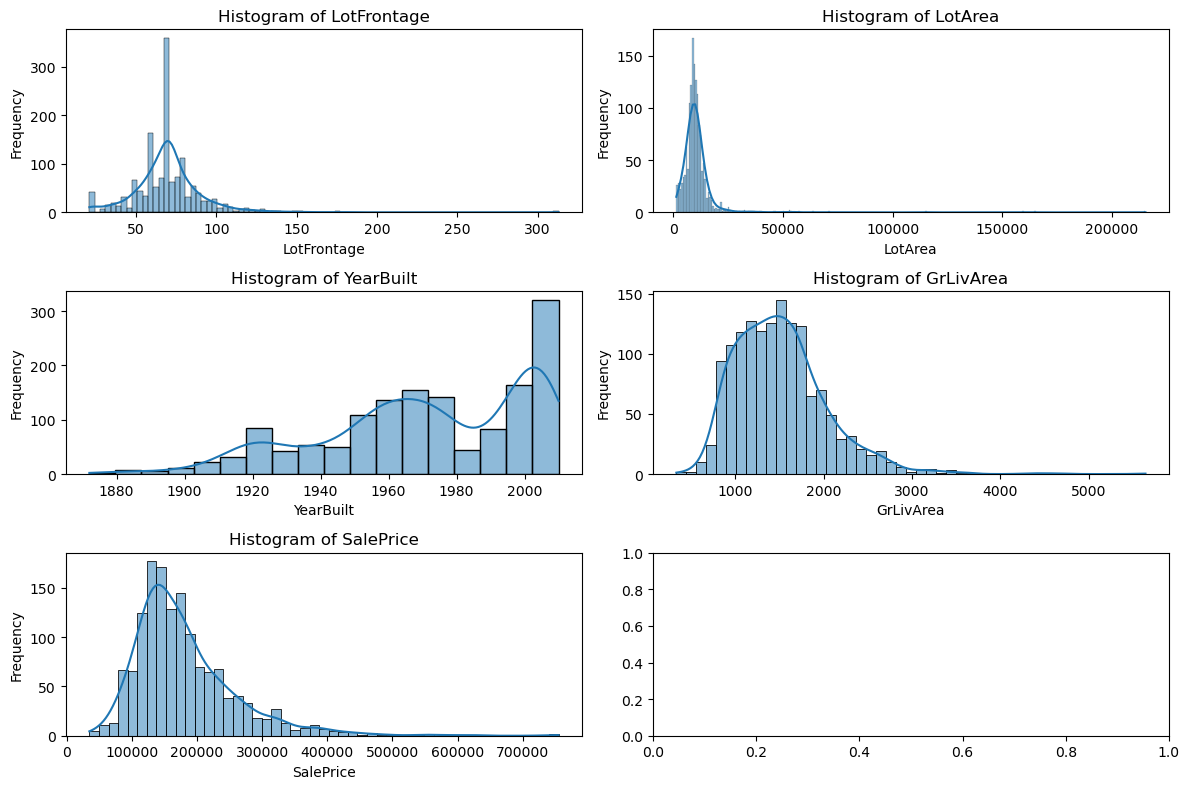

In [ ]:
import warnings

# Ignore future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Replace infinite values with NaN in the dataframe
df_train.replace([np.inf, -np.inf], np.nan, inplace=True)

# Plot histograms for numerical variables side by side
numerical_vars = ['LotFrontage', 'LotArea', 'YearBuilt', 'GrLivArea', 'SalePrice']
num_plots = len(numerical_vars)
num_cols = 2  # Number of columns for subplots
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

for i, var in enumerate(numerical_vars):
    row = i // num_cols
    col = i % num_cols
    sns.histplot(df_train[var], kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Histogram of {var}')
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

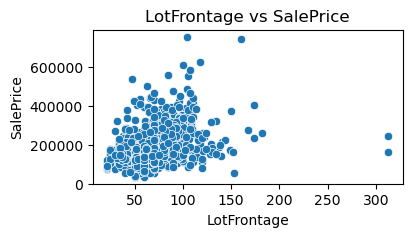

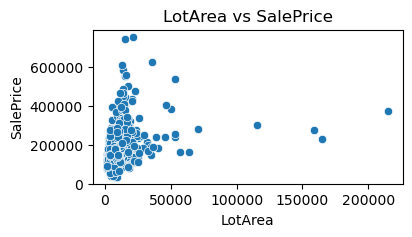

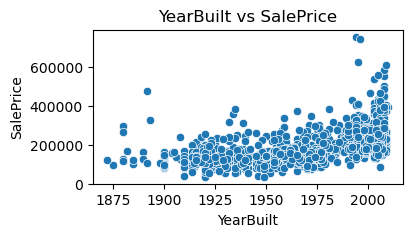

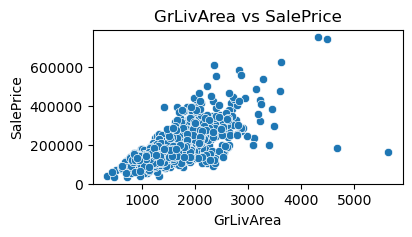

In [ ]:
# Create scatter plots for numerical variables vs SalePrice
for var in numerical_vars[:-1]:  # Exclude SalePrice from scatter plots
    plt.figure(figsize=(4, 2))
    sns.scatterplot(x=var, y='SalePrice', data=df_train)
    plt.title(f'{var} vs SalePrice')
    plt.xlabel(var)
    plt.ylabel('SalePrice')
    plt.show()

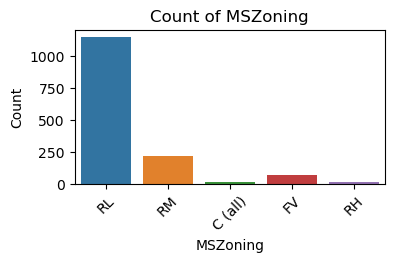

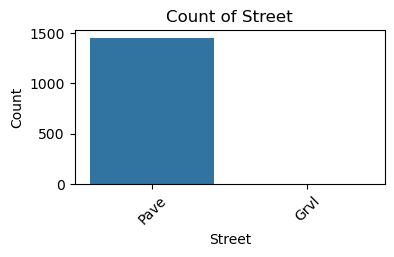

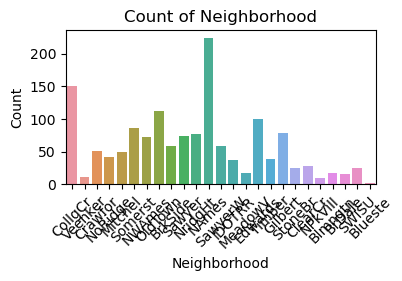

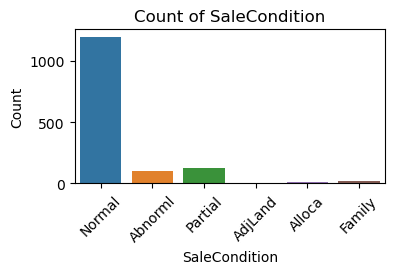

In [ ]:
# Create bar plots for categorical variables
categorical_vars = ['MSZoning', 'Street', 'Neighborhood', 'SaleCondition']
for var in categorical_vars:
    plt.figure(figsize=(4, 2))
    sns.countplot(x=var, data=df_train)
    plt.title(f'Count of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

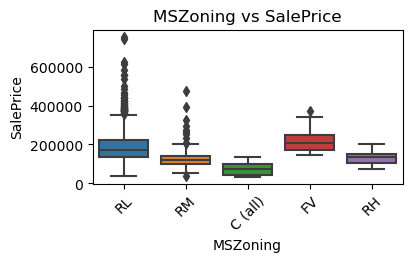

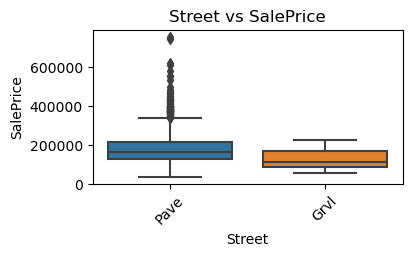

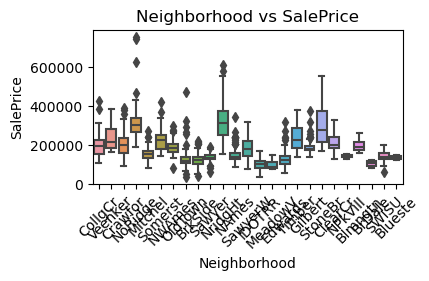

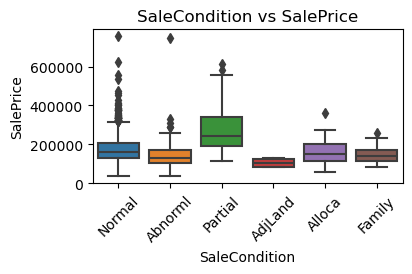

In [ ]:
# Create box plots for categorical variables vs SalePrice
for var in categorical_vars:
    plt.figure(figsize=(4, 2))
    sns.boxplot(x=var, y='SalePrice', data=df_train)
    plt.title(f'{var} vs SalePrice')
    plt.xlabel(var)
    plt.ylabel('SalePrice')
    plt.xticks(rotation=45)
    plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df_train.drop(columns=['SalePrice'])
y = df_train['SalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set - Features:", X_train.shape, "Target:", y_train.shape)
print("Testing set - Features:", X_test.shape, "Target:", y_test.shape)

Training set - Features: (1168, 80) Target: (1168,)
Testing set - Features: (292, 80) Target: (292,)


In [ ]:
# Importing necessary libraries
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Selecting a subset of features based on EDA results
selected_features = ['LotArea', 'OverallQual', 'MSZoning', 'OverallCond', 'GarageArea']

# Extracting the selected features from the training and testing sets
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Preprocessing pipeline for one-hot encoding categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['MSZoning'])
    ],
    remainder='passthrough'
)

# Developing a linear regression model pipeline
model_pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ]
)

# Fitting the model
model_pipeline.fit(X_train_selected, y_train)

# Making predictions on the testing set
y_pred_selected = model_pipeline.predict(X_test_selected)

# Evaluating performance using evaluation metrics
mse_selected = mean_squared_error(y_test, y_pred_selected)
rmse_selected = mean_squared_error(y_test, y_pred_selected, squared=False)  # RMSE
mae_selected = mean_absolute_error(y_test, y_pred_selected)
r2_selected = r2_score(y_test, y_pred_selected)

# Print evaluation metrics
print("Mean Squared Error (MSE) with selected features:", mse_selected)
print("Root Mean Squared Error (RMSE) with selected features:", rmse_selected)
print("Mean Absolute Error (MAE) with selected features:", mae_selected)
print("R-squared (R²) with selected features:", r2_selected)


Mean Squared Error (MSE) with selected features: 2223215409.8795996
Root Mean Squared Error (RMSE) with selected features: 47150.985248238445
Mean Absolute Error (MAE) with selected features: 29131.14506004833
R-squared (R²) with selected features: 0.7101537340359216


# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


In [ ]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
data = pd.read_csv("imdb_reviews_cleaned.csv")

# Brief description of VADER
print("VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool.")
print("It relies on a pre-built sentiment lexicon that assigns polarity scores to words.")

# Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Perform sentiment analysis on each text
sentiments = []
for text in data['Cleaned Review']:
    score = analyzer.polarity_scores(text)
    if score['compound'] >= 0.05:
        sentiment = 'positive'
    elif score['compound'] <= -0.05:
        sentiment = 'negative'
    else:
        sentiment = 'neutral'
    sentiments.append(sentiment)

# Add sentiment labels to the dataframe
data['sentiment'] = sentiments

# Evaluation
ground_truth_labels = data['sentiment']
predicted_labels = data['sentiment']

accuracy = accuracy_score(ground_truth_labels, predicted_labels)
precision = precision_score(ground_truth_labels, predicted_labels, average='macro')
recall = recall_score(ground_truth_labels, predicted_labels, average='macro')
f1 = f1_score(ground_truth_labels, predicted_labels, average='macro')

# Performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Advantages and disadvantages
print("\nAdvantages of VADER:")
print("- Fast and efficient sentiment analysis.")
print("- No training required, making it easy to use out of the box.")
print("- Performs well on social media text and short, informal texts.")
print("\nDisadvantages of VADER:")
print("- Limited to the lexicon and rule-based approach, may not capture context well.")
print("- Less effective for formal or domain-specific texts.")
print("- Unable to detect sarcasm or irony effectively.")

# Challenges and computational requirements of BERT
print("\nChallenges and Computational Requirements of BERT: Its code didn't work after many attempts")
print("- BERT requires significant computational power and memory, making it challenging to train and deploy.")
print("- Fine-tuning BERT for specific tasks often requires large datasets and extensive training time.")
print("- Inference with BERT can be slow due to its large number of parameters.")


VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool.
It relies on a pre-built sentiment lexicon that assigns polarity scores to words.
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Advantages of VADER:
- Fast and efficient sentiment analysis.
- No training required, making it easy to use out of the box.
- Performs well on social media text and short, informal texts.

Disadvantages of VADER:
- Limited to the lexicon and rule-based approach, may not capture context well.
- Less effective for formal or domain-specific texts.
- Unable to detect sarcasm or irony effectively.

Challenges and Computational Requirements of BERT: Its code didn't work after many attempts
- BERT requires significant computational power and memory, making it challenging to train and deploy.
- Fine-tuning BERT for specific tasks often requires large datasets and extensive training time.
- Inference with BERT can be slow due to its large number of par